In [41]:
#data manipulation
import numpy as np
import pandas as pd

#netowrk analysis
import networkx as nx

#plotting
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns





#filter warnings for final presentation
import warnings
warnings.filterwarnings("ignore")

#notebook formatting
from IPython.core.display import display, HTML

In [42]:
# read csv file
raw_asset_prices_df = pd.read_csv("pythonData.csv")

# get number of rows and columns of the dataset
df_shape = (raw_asset_prices_df.shape)
print(f"There are {df_shape[0]} rows and {df_shape[1]} columns in the dataset")
print(f"Data timeperiod covers: {min(raw_asset_prices_df.index)} to {max(raw_asset_prices_df.index)}")

# show first five rows
raw_asset_prices_df.head()

There are 377 rows and 58 columns in the dataset
Data timeperiod covers: 0 to 376


,ARS/USD,AUD/USD,ATS/USD,BEF/USD,BRL/USD,GBP/USD,BGN/USD,CAD/USD,CLP/USD,CNY/USD,...,SIT/USD,ZAR/USD,KRW/USD,ESP/USD,XDR/USD,SEK/USD,CHF/USD,TWD/USD,THB/USD,TRY/USD
0,59.732,1.4286,12.282,36.006,4.0219,0.76181,1.7469,1.3059,746.73,6.9872,...,213.89,14.087,1156.7,148.51,0.72282,9.3279,0.96898,30.062,29.938,5.9440
1,59.408,1.4238,12.255,35.928,4.0198,0.75626,1.7401,1.2988,742.67,6.9641,...,213.43,14.009,1154.5,148.19,0.72148,9.3171,0.96659,29.919,29.775,5.9496
2,59.797,1.4310,12.312,36.095,4.0273,0.76043,1.7465,1.2992,750.22,6.9625,...,214.42,14.096,1159.0,148.88,0.72281,9.3602,0.97144,30.019,30.130,5.9569
3,59.833,1.4375,12.328,36.141,4.0486,0.76432,1.7554,1.2988,757.08,6.9678,...,214.70,14.277,1165.9,149.07,0.72320,9.3980,0.97179,30.044,30.169,5.9742
4,59.648,1.4418,12.296,36.046,4.0582,0.76008,1.7464,1.2970,772.36,6.9769,...,214.13,14.229,1168.5,148.68,0.72248,9.4122,0.96907,30.072,30.132,5.9715


In [43]:
# create empty dataframe for log returns information
log_returns_df = pd.DataFrame()

# calculate log returns of each asset
# loop through each column in dataframe and and calculate the daily log returns 
# add log returns column to new a dataframe
for col in raw_asset_prices_df.columns:
    # dates are given in reverse order so need to set diff to -1.
    log_returns_df[col] = np.log(raw_asset_prices_df[col]).diff(-1)
    
#check output of log returns dataframe
log_returns_df.head()

,ARS/USD,AUD/USD,ATS/USD,BEF/USD,BRL/USD,GBP/USD,BGN/USD,CAD/USD,CLP/USD,CNY/USD,...,SIT/USD,ZAR/USD,KRW/USD,ESP/USD,XDR/USD,SEK/USD,CHF/USD,TWD/USD,THB/USD,TRY/USD
0,0.005439,0.003366,0.002201,0.002169,0.000522,0.007312,0.003900,0.005452,0.005452,0.003312,...,0.002153,0.005552,0.001904,0.002157,0.001856,0.001158,0.002470,0.004768,0.005459,-0.000942
1,-0.006527,-0.005044,-0.004640,-0.004637,-0.001864,-0.005499,-0.003671,-0.000308,-0.010115,0.000230,...,-0.004628,-0.006191,-0.003890,-0.004645,-0.001842,-0.004615,-0.005005,-0.003337,-0.011852,-0.001226
2,-0.000602,-0.004532,-0.001299,-0.001274,-0.005275,-0.005102,-0.005083,0.000308,-0.009102,-0.000761,...,-0.001305,-0.012759,-0.005936,-0.001275,-0.000539,-0.004030,-0.000360,-0.000832,-0.001294,-0.002900
3,0.003097,-0.002987,0.002599,0.002632,-0.002368,0.005563,0.005140,0.001387,-0.019982,-0.001305,...,0.002658,0.003368,-0.002228,0.002620,0.000996,-0.001510,0.002803,-0.000932,0.001227,0.000452
4,-0.002562,-0.009869,-0.003896,-0.003904,-0.004573,-0.002654,-0.003373,-0.003002,0.005244,0.004511,...,-0.003915,-0.004977,0.000599,-0.003893,-0.001134,-0.003722,-0.002257,0.000699,-0.005659,-0.000234


In [44]:
#calculate correlation matrix using inbuilt pandas function
correlation_matrix = log_returns_df.corr()

#show first five rows of the correlation matrix 
correlation_matrix.head()


,ARS/USD,AUD/USD,ATS/USD,BEF/USD,BRL/USD,GBP/USD,BGN/USD,CAD/USD,CLP/USD,CNY/USD,...,SIT/USD,ZAR/USD,KRW/USD,ESP/USD,XDR/USD,SEK/USD,CHF/USD,TWD/USD,THB/USD,TRY/USD
ARS/USD,1.000000,-0.124820,0.022055,0.021801,0.020894,-0.066735,-0.109365,-0.142517,-0.044246,-0.151372,...,0.022064,-0.035086,-0.148366,0.021245,-0.019497,-0.017604,0.101288,-0.035471,-0.124374,-0.032427
AUD/USD,-0.124820,1.000000,0.621052,0.621214,0.408972,0.712857,0.579087,0.764388,0.415569,0.436003,...,0.620893,0.561024,0.658075,0.621307,0.691441,0.736135,0.468905,0.395330,0.485628,0.268385
ATS/USD,0.022055,0.621052,1.000000,0.999961,0.259643,0.564354,0.780295,0.486855,0.212785,0.423589,...,0.999953,0.323380,0.390409,0.999949,0.949960,0.804808,0.851810,0.306380,0.290433,0.168038
BEF/USD,0.021801,0.621214,0.999961,1.000000,0.259422,0.564280,0.779871,0.486992,0.212589,0.424422,...,0.999985,0.323697,0.390510,0.999974,0.950094,0.804701,0.852097,0.306002,0.290734,0.167987
BRL/USD,0.020894,0.408972,0.259643,0.259422,1.000000,0.312696,0.204543,0.444152,0.477079,0.251121,...,0.259415,0.593025,0.433729,0.259735,0.265700,0.357613,0.116724,0.229992,0.250495,0.253858


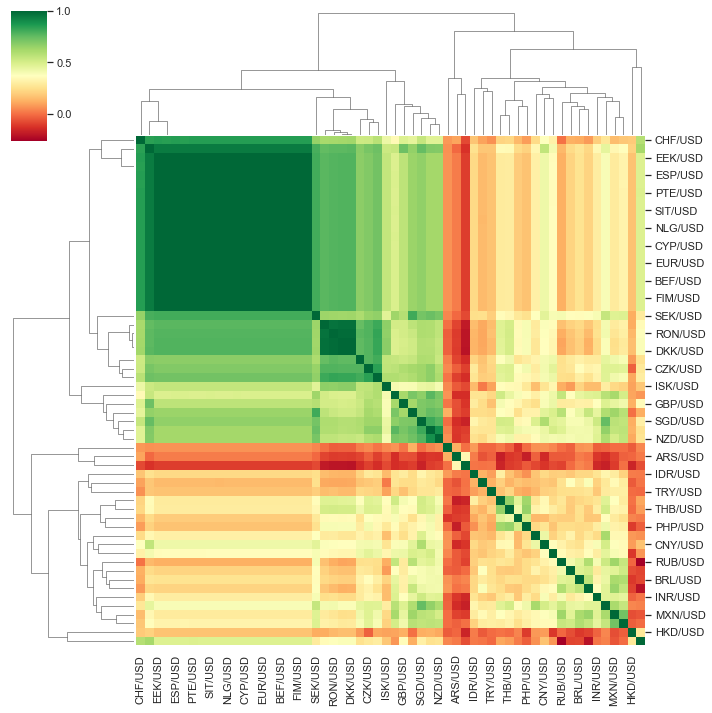

In [45]:
#visualise correlation matrix using a clustered heatmap
display(HTML("<h3>Clustered Heatmap: Correlations between asset price returns</h3>"))
sns.clustermap(correlation_matrix, cmap="RdYlGn")
plt.show()


In [46]:
#convert matrix to list of edges and rename the columns
edges = correlation_matrix.stack().reset_index()
edges.columns = ['asset_1','asset_2','correlation']

#remove self correlations
edges = edges.loc[edges['asset_1'] != edges['asset_2']].copy()

#show the first 5 rows of the edge list dataframe.
edges.head()


,asset_1,asset_2,correlation
1,ARS/USD,AUD/USD,-0.124820
2,ARS/USD,ATS/USD,0.022055
3,ARS/USD,BEF/USD,0.021801
4,ARS/USD,BRL/USD,0.020894
5,ARS/USD,GBP/USD,-0.066735


In [47]:
#create undirected graph with weights corresponding to the correlation magnitude
G0 = nx.from_pandas_edgelist(edges, 'asset_1', 'asset_2', edge_attr=['correlation'])

#print out the graph info
#check number of nodes and degrees are as expected (all should have degree = 38, i.e. average degree = 38)
print(nx.info(G0))


Graph with 58 nodes and 1653 edges


In [48]:
# 'winner takes all' method - set minium correlation threshold to remove some edges from the diagram
threshold = 0.3

# create a new graph from edge list
Gx = nx.from_pandas_edgelist(edges, 'asset_1', 'asset_2', edge_attr=['correlation'])

# list to store edges to remove
remove = []
# loop through edges in Gx and find correlations which are below the threshold
for asset_1, asset_2 in Gx.edges():
    corr = Gx[asset_1][asset_2]['correlation']
    #add to remove node list if abs(corr) < threshold
    if abs(corr) < threshold:
        remove.append((asset_1, asset_2))

# remove edges contained in the remove list
Gx.remove_edges_from(remove)

print(str(len(remove)) + " edges removed")


695 edges removed


In [49]:
def assign_colour(correlation):
    if correlation <= 0:
        return "#ffa09b"  # red
    else:
        return "#9eccb7"  # green


def assign_thickness(correlation, benchmark_thickness=2, scaling_factor=3):
    return benchmark_thickness * abs(correlation)**scaling_factor


def assign_node_size(degree, scaling_factor=50):
    return degree * scaling_factor


# assign colours to edges depending on positive or negative correlation
# assign edge thickness depending on magnitude of correlation
edge_colours = []
edge_width = []
for key, value in nx.get_edge_attributes(Gx, 'correlation').items():
    edge_colours.append(assign_colour(value))
    edge_width.append(assign_thickness(value))

# assign node size depending on number of connections (degree)
node_size = []
for key, value in dict(Gx.degree).items():
    node_size.append(assign_node_size(value))

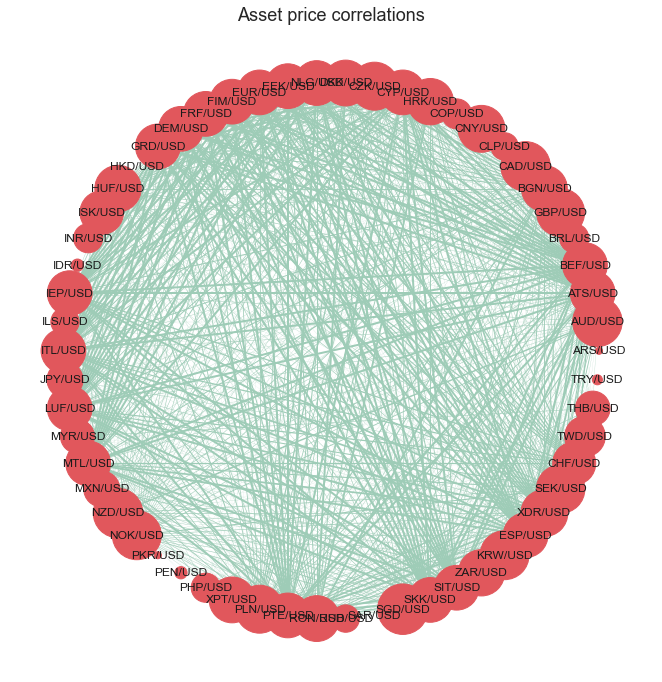

In [50]:
# draw improved graph
sns.set(rc={'figure.figsize': (9, 9)})
font_dict = {'fontsize': 18}

nx.draw(Gx, pos=nx.circular_layout(Gx), with_labels=True,
        node_size=node_size, node_color="#e1575c", edge_color=edge_colours,
        width=edge_width)
plt.title("Asset price correlations", fontdict=font_dict)
plt.show()

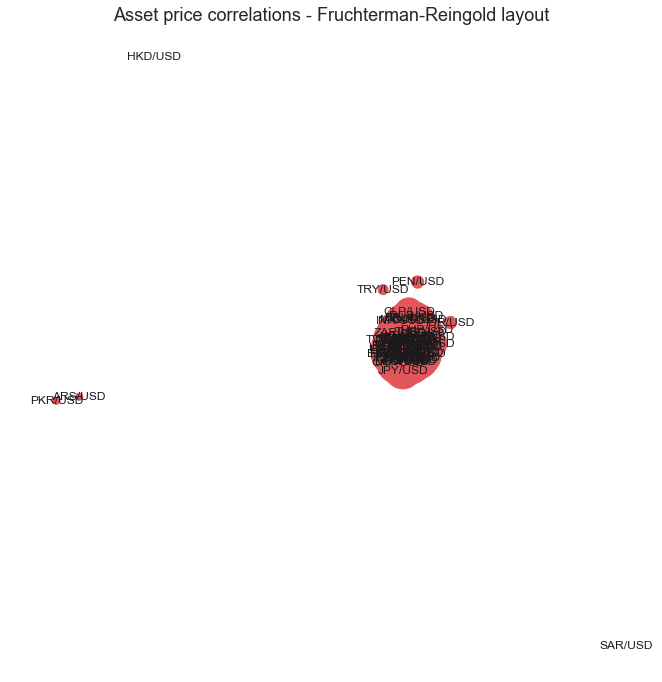

In [51]:
# draw improved graph
nx.draw(Gx, pos=nx.fruchterman_reingold_layout(Gx), with_labels=True,
        node_size=node_size, node_color="#e1575c", edge_color=edge_colours,
       width = edge_width)
plt.title("Asset price correlations - Fruchterman-Reingold layout",fontdict=font_dict)
plt.show()

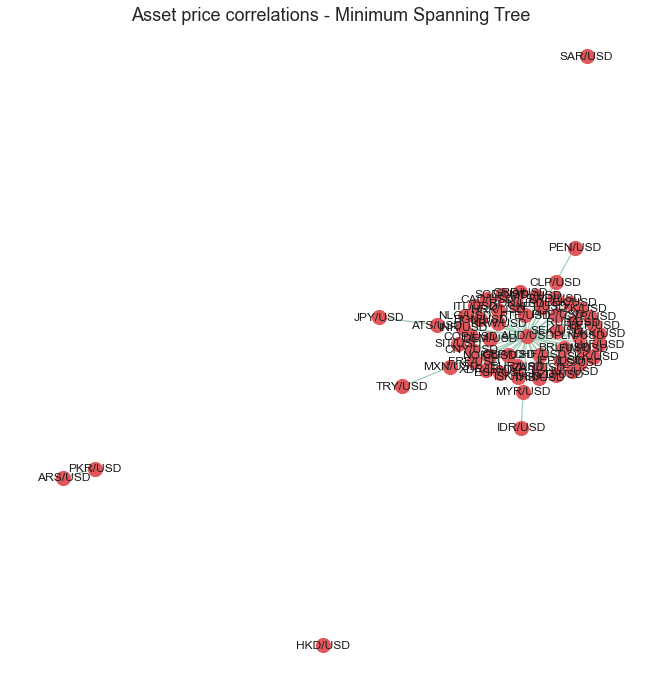

In [52]:
#create minimum spanning tree layout from Gx (after small correlations have been removed)
mst = nx.minimum_spanning_tree(Gx)

edge_colours = []

#assign edge colours
for key, value in nx.get_edge_attributes(mst, 'correlation').items():
    edge_colours.append(assign_colour(value))

    
#draw minimum spanning tree. Set node size and width to constant
nx.draw(mst, with_labels=True, pos=nx.fruchterman_reingold_layout(mst),
        node_size=200, node_color="#e1575c", edge_color=edge_colours,
       width = 1.2)

#set title
plt.title("Asset price correlations - Minimum Spanning Tree",fontdict=font_dict)
plt.show()
